In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [32]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/ENV717')
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/ENV717'

## Question 2

In [34]:
#Read the CSV file and parse dates based on date_cols
date_cols = ['datetime_beginning_utc', 'datetime_beginning_ept']
pjm = pd.read_csv('hrl_dmd_bids.csv', parse_dates=date_cols, 
                          date_parser=lambda col: pd.to_datetime(col, utc=True))

#Select rows from PJM bid
pjm = pjm.loc[pjm.area == 'PJM_RTO']

#Drop columns with area and date in UTC format information 
pjm.drop(columns=['datetime_beginning_utc', 'area'], inplace=True)
pjm

,datetime_beginning_ept,hrly_da_demand_bid
2,2022-12-31 23:00:00+00:00,72835.0
5,2022-12-31 22:00:00+00:00,76891.0
8,2022-12-31 21:00:00+00:00,80787.0
11,2022-12-31 20:00:00+00:00,82890.0
14,2022-12-31 19:00:00+00:00,83720.0
...,...,...
26267,2022-01-01 04:00:00+00:00,63761.0
26270,2022-01-01 03:00:00+00:00,63771.0
26273,2022-01-01 02:00:00+00:00,64830.0
26276,2022-01-01 01:00:00+00:00,67228.0


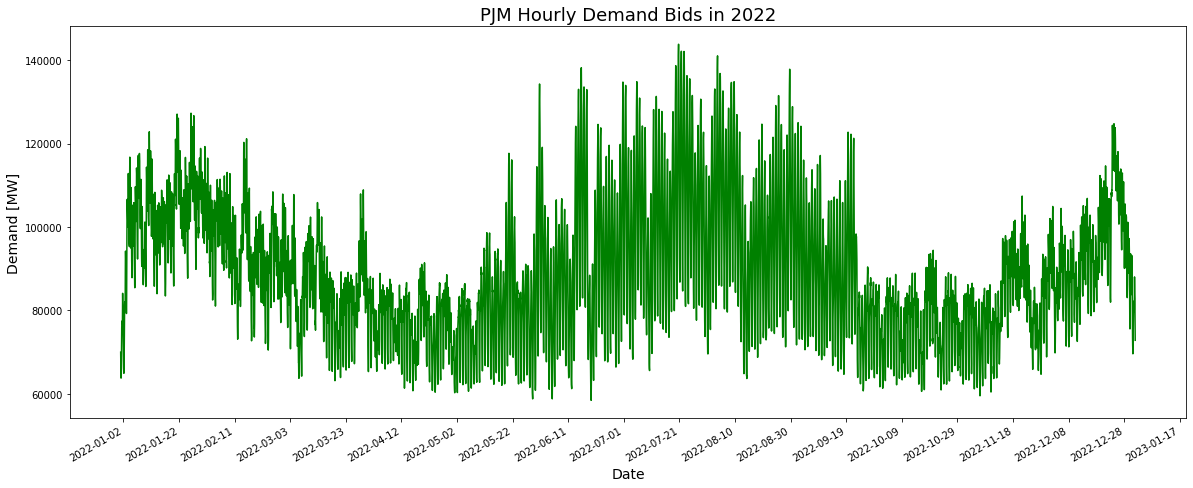

In [35]:
#Configure size of plot
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)

#Add title and axis labels
plt.title("PJM Hourly Demand Bids in 2022", size=18)
plt.xlabel('Date', size =14) 
plt.ylabel('Demand [MW]', size =14) 

#Format time axis, arbitrarily selecting 10 days as step for major ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=20))

#plot time series data
plt.plot(pjm.datetime_beginning_ept, pjm.hrly_da_demand_bid, color="green")
plt.gcf().autofmt_xdate() #GCF means "get the current figure"

#Save plot
plt.savefig('pjm_hourly_demand_bids.png')
plt.show()

In [36]:
print("Peak demand (in MW): ", max(pjm.hrly_da_demand_bid))
print("5 highest demands:")
#Sort the dataframe based on the highest bid
pjm.sort_values(by='hrly_da_demand_bid', ascending=False).head(n=5)

Peak demand (in MW):  143864.0
5 highest demands:


,datetime_beginning_ept,hrly_da_demand_bid
11834,2022-07-20 16:00:00+00:00,143864.0
11831,2022-07-20 17:00:00+00:00,143819.0
11837,2022-07-20 15:00:00+00:00,142681.0
11762,2022-07-21 16:00:00+00:00,142190.0
11690,2022-07-22 16:00:00+00:00,142138.0
